#### NAME: ANBUSELVAN MAHALINGAM
#### SUBJECT: DSC 640 DATA PRESENTATION AND VISUALIZATION - WEEK 7 & 8

In [25]:
import warnings
# To suppress warnings
warnings.filterwarnings('ignore')

In [26]:
# To load the dataset
import plotly.express as px
import pandas as pd

try:
    data_fr = pd.read_csv("ppg2008.csv")
except:
    print(r"Unable to read file,Please validate the file and try again.!")

In [27]:
data_fr.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


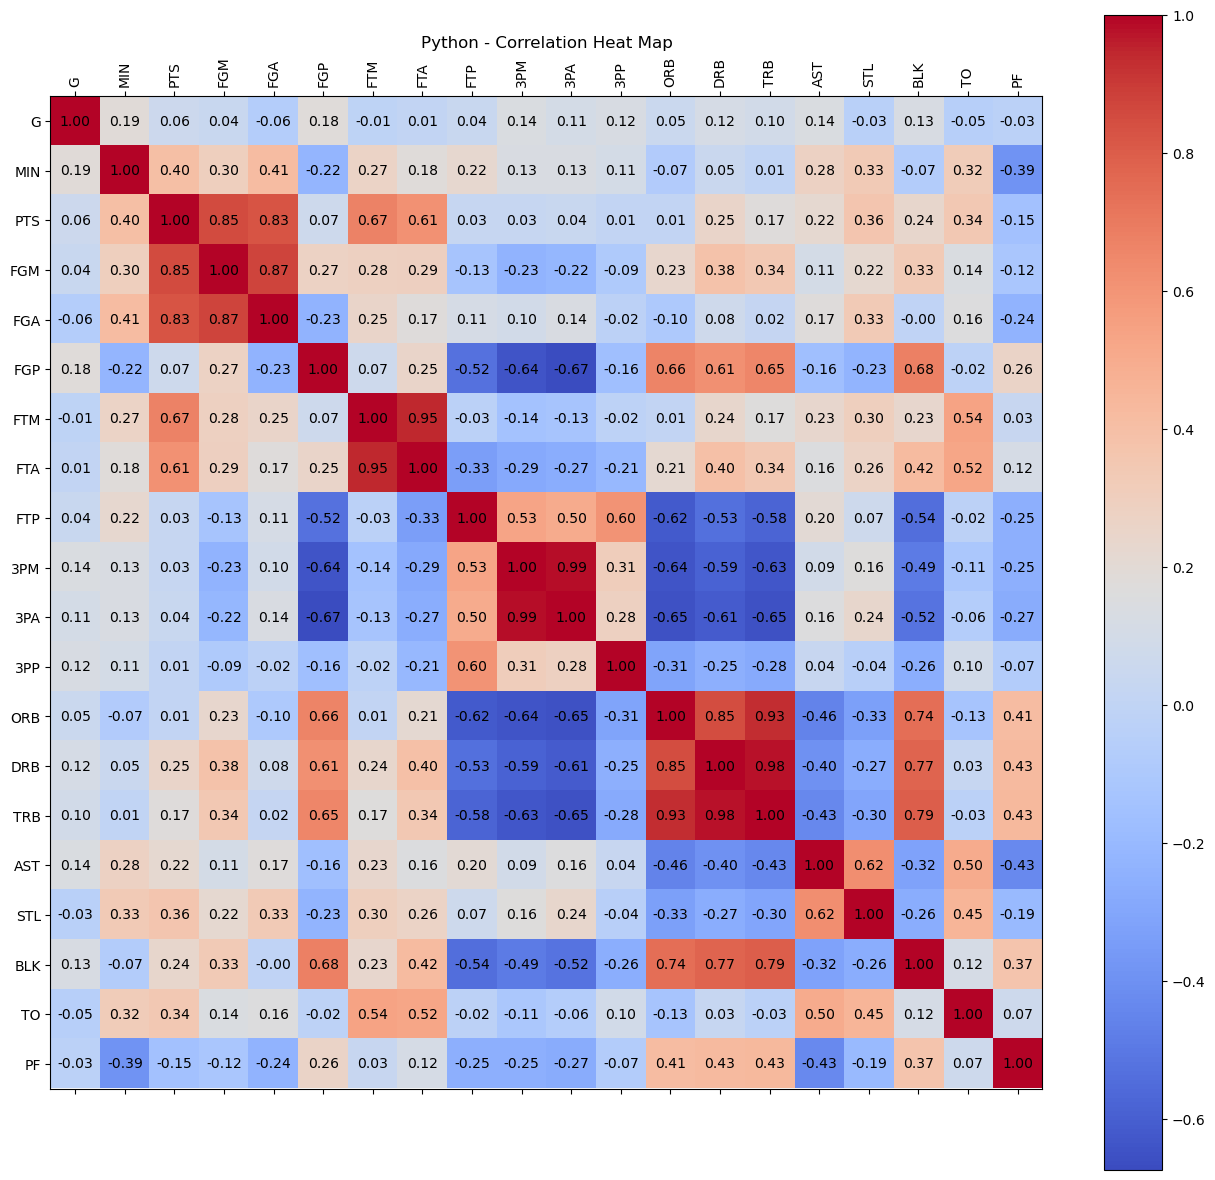

In [28]:
# Create HeatMap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# To filter only the numeric values for correlation
numeric_data = data_fr.select_dtypes(include=[float, int])

# To calculate the correlation matrix
corr = numeric_data.corr()

# Create the heatmap using pandas.plotting
fig, ax = plt.subplots(figsize=(16, 15)) 

# Plotting the heatmap
cax = ax.matshow(corr, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.index)

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        text = ax.text(j, i, f'{corr.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

plt.title('Python - Correlation Heat Map')
plt.savefig('python_heat_map.png', bbox_inches='tight')
plt.show()

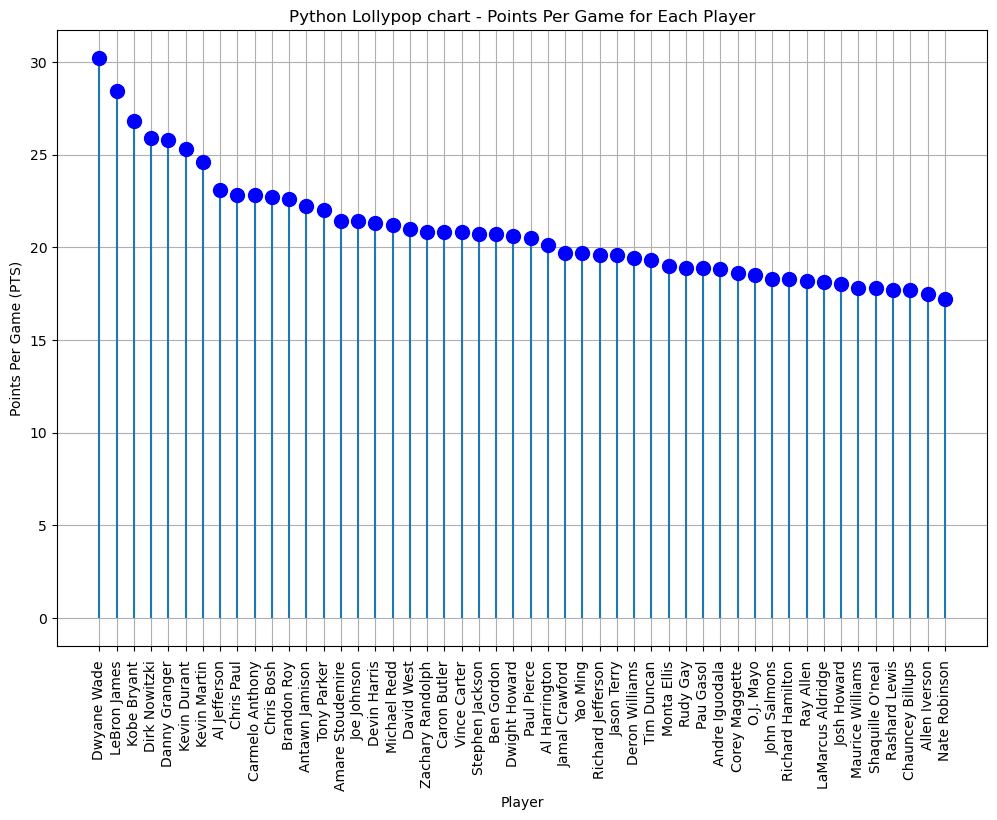

In [29]:
# To Create lollipop chart

# To strip whitespace from column names
data_fr.columns = data_fr.columns.str.strip()

# To sort points per game in descending order
data_sorted = data_fr.sort_values(by='PTS', ascending=False)

# To plot the lollipop chart
plt.figure(figsize=(12, 8))
plt.stem(data_sorted['Name'], data_sorted['PTS'], basefmt=" ")
plt.scatter(data_sorted['Name'], data_sorted['PTS'], color='blue', s=100, zorder=3)
plt.xlabel('Player')
plt.ylabel('Points Per Game (PTS)')
plt.title('Python Lollypop chart - Points Per Game for Each Player')
plt.xticks(rotation=90)
plt.grid(True)

# To Save the plot
lollipop_chart_path = 'python_lollipop_chart.png'
plt.savefig(lollipop_chart_path, bbox_inches='tight')
plt.show()

In [30]:
# To create spatial charts

# To load the dataset
import plotly.express as px
import pandas as pd

try:
    costco_data_fr = pd.read_csv("costcos-geocoded.csv")
except:
    print(r"Unable to read file,Please validate the file and try again.!")


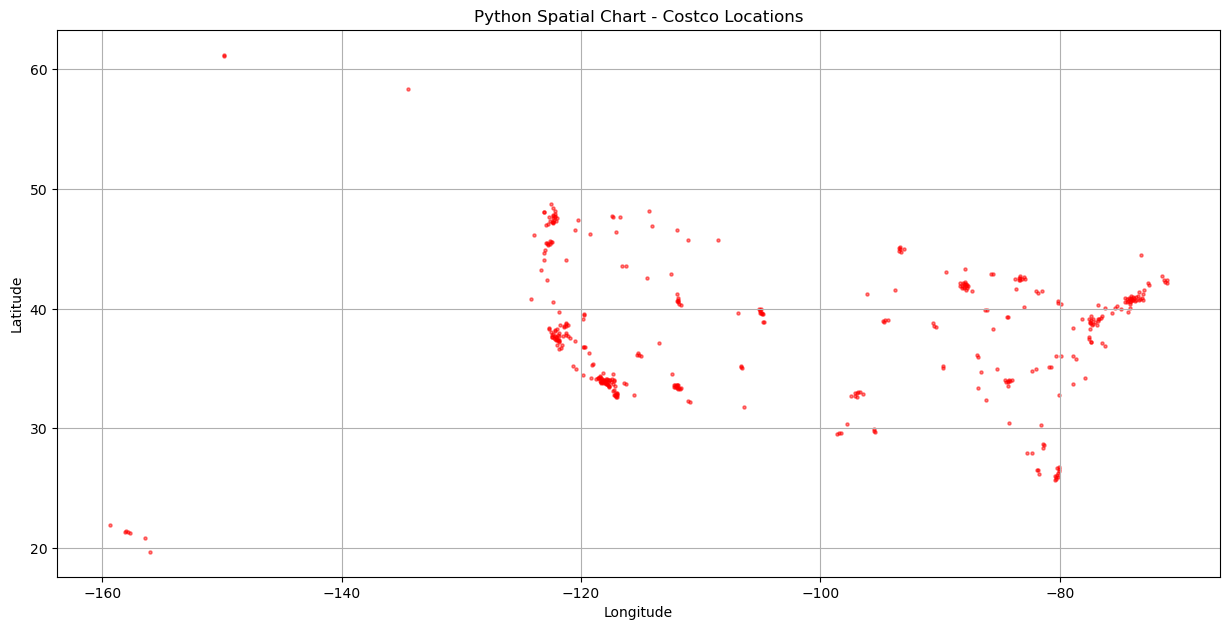

In [31]:
# To create spatial charts
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd

# To create a GeoDataFrame
geometry = [Point(xy) for xy in zip(costco_data_fr['Longitude'], costco_data_fr['Latitude'])]
geo_df = gpd.GeoDataFrame(costco_data_fr, geometry=geometry)

# To plot the spatial data
fig, ax = plt.subplots(figsize=(15, 10))
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.5)
ax.set_title('Python Spatial Chart - Costco Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True)

# To save the plot
spatial_chart_path = 'python_spatial_chart.png'
plt.savefig(spatial_chart_path, bbox_inches='tight')
plt.show()


In [2]:
# To merge png visualizations into a pdf

from fpdf import FPDF
import os

# To create instance of FPDF class
pdf = FPDF()

# directory containing the images
image_dir = r'C:\Users\anu18\Desktop\DSC-640\ex6-2\image'

# To list image files to include in the PDF
image_files = [
    'python-histogram.png',
    'python-box_plot.png',
    'python-bulletchart.png',
    'python-circleviewchart.png',
    'r_histogram.png',
    'r_box_plot.png',
    'r_bullet_chart_usa.png',
    'r_circle_views_chart.png',
    'tableau_Histogram.png',
    'tableau_Box-plot.png',
    'tableau_Bulletchart.png',
    'tableau_CircleView.png'
]

# Add each image to the PDF
for image_file in image_files:
    pdf.add_page()
    pdf.image(os.path.join(image_dir, image_file), x = 10, y = 10, w = 190)

# Save the PDF
pdf.output("DSC640_MAHALINGAM-WEEK9&10-VISUALIZATION.pdf")

print("PDF created successfully!")

PDF created successfully!
